#FOOTBALL ANALYSIS

##1. Defining the Question

###a) Specifying the Data Analytic Question


This is a football analysis project for Mchezopesa Ltd, which is a Football Company. The task involves predicting the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. In the analysis, the rank of each team is included.


###b) Defining the Metric of Success


The metric of success for this project is to be able to build a model that can predict the home_score and away_score. Another metric of success is the ability perform Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D).

###c) Understanding the Context


This is a football analysis project, where two teams, where one is playing at home and another one is playing away are compared in terms of goals scored and ranked accordingly. 
A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams.
The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidyingthe datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate,Bivariate, and Multivariate).

5.Perform any necessary feature engineering.

6.Check of multicollinearity.

7.Start building the model.

8.Cross-validate the model.

9.Compute RMSE.

10.Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.

11.Perform appropriate regressions on the data including your justification.

12.Challenge your solution by providing insights on how you can make improvements.


###e) Data Relevance

The data has been obtained from the FIFA, which is the body that governs football worldwide. Therefore, the data is credible and reliable.

##2. Reading Data

In [2]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,f1_score

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
# Reading the data from the two datasets
fifa=pd.read_csv('fifa_ranking.csv')
results=pd.read_csv('results.csv')

##3. Checking the data

In [3]:
# Let's define a function that will enable us to preview the first five rows in both datasets and printing them in a tabular form
def tabulatetable(data):
  print(tabulate(data.head(), headers='keys', tablefmt='psql'))
tabulatetable(fifa)
tabulatetable(results)

+----+--------+----------------+----------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------+
|    |   rank | country_full   | country_abrv   |   total_points |   previous_points |   rank_change |   cur_year_avg |   cur_year_avg_weighted |   last_year_avg |   last_year_avg_weighted |   two_year_ago_avg |   two_year_ago_weighted |   three_year_ago_avg |   three_year_ago_weighted | confederation   | rank_date   |
|----+--------+----------------+----------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------|
|  0 |      1 | Germany        | GER 

In [4]:
# Let's define a function that will enable us to preview the last five rows in both datasets and printing them in a tabular form
def tabulatetail(data):
  print(tabulate(data.tail(), headers='keys', tablefmt='psql'))
tabulatetail(fifa)
tabulatetail(results)

+-------+--------+-------------------+----------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------+
|       |   rank | country_full      | country_abrv   |   total_points |   previous_points |   rank_change |   cur_year_avg |   cur_year_avg_weighted |   last_year_avg |   last_year_avg_weighted |   two_year_ago_avg |   two_year_ago_weighted |   three_year_ago_avg |   three_year_ago_weighted | confederation   | rank_date   |
|-------+--------+-------------------+----------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------|
| 41356 |    149 | 

In [5]:
# Checking the shape of the datasets (rows and columns)
print(fifa.shape)
print(results.shape)

(41361, 16)
(40839, 9)


In [6]:
# Checking all the columns have the appropriate datatype
print(fifa.dtypes)
print('------------------------------------------')
print(results.dtypes)

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
------------------------------------------
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


The date type in both dataframes is object. In the cleaning phase, I will change it to datetime data type.

In [7]:
# Checking the information about the datasets
print(fifa.info())
print('------------------------------------------')
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   country_abrv             41360 non-null  object 
 3   total_points             41360 non-null  float64
 4   previous_points          41360 non-null  float64
 5   rank_change              41360 non-null  float64
 6   cur_year_avg             41360 non-null  float64
 7   cur_year_avg_weighted    41360 non-null  float64
 8   last_year_avg            41360 non-null  float64
 9   last_year_avg_weighted   41360 non-null  float64
 10  two_year_ago_avg         41360 non-null  float64
 11  two_year_ago_weighted    41360 non-null  float64
 12  three_year_ago_avg       41360 non-null  float64
 13  three_year_ago_weighted  41360 non-null  float64
 14  confederation         

In [8]:
# Checking the statistical information of the numerical values in our datasets
# Defining a function to display the statistical information of the numerical values in the datasets
def tabulatedesc(data):
  print(tabulate(data.describe(), headers='keys', tablefmt='psql'))
tabulatedesc(fifa)
tabulatedesc(fifa)

+-------+------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+
|       |       rank |   total_points |   previous_points |   rank_change |   cur_year_avg |   cur_year_avg_weighted |   last_year_avg |   last_year_avg_weighted |   two_year_ago_avg |   two_year_ago_weighted |   three_year_ago_avg |   three_year_ago_weighted |
|-------+------------+----------------+-------------------+---------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------|
| count | 41361      |    41360       |         41360     | 41360         |    41360       |             41360       |     41360       |              41360       |        41360       |             41360       |    

##4. External Data Source Validation

The data has been obtained from the FIFA, which is the body that governs football worldwide. Therefore, the data is credible and reliable.

##5. Tidying the Datasets

In [9]:
# Checking for Outliers
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(fifa)

       confederation  country_abrv  country_full  cur_year_avg  \
0              False         False         False         False   
1              False         False         False         False   
2              False         False         False         False   
3              False         False         False         False   
4              False         False         False         False   
...              ...           ...           ...           ...   
41356          False         False         False          True   
41357          False         False         False          True   
41358          False         False         False          True   
41359          False         False         False          True   
41360          False         False         False         False   

       cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0                      False          False                   False   
1                      False          False                   Fal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()


The fifa dataset has a total of 820 outliers in the different columns outlined above.

In [10]:
# Dropping the neutral column in the results dataset so that we can find is the dataset has any outliers. Futhermore, the column 
# is not relevant in our analysis
results=results.drop('neutral', axis =1)

In [11]:
# Plotting outliers in the results dataset
outliers(results)

       away_score  away_team   city  country   date  home_score  home_team  \
0           False      False  False    False  False       False      False   
1           False      False  False    False  False        True      False   
2           False      False  False    False  False       False      False   
3           False      False  False    False  False       False      False   
4           False      False  False    False  False       False      False   
...           ...        ...    ...      ...    ...         ...        ...   
40834       False      False  False    False  False        True      False   
40835       False      False  False    False  False        True      False   
40836       False      False  False    False  False       False      False   
40837       False      False  False    False  False       False      False   
40838       False      False  False    False  False       False      False   

       tournament  
0           False  
1           False  
2  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()


The results dataset has a total of 3 outliers in the home_score and away_score columns as outlined above.

In [12]:
# Creating a box plot 
# Defining a function to create a box plot for column with outliers
def boxplot(data,y):
  fig = px.box(data, y)
  fig.show()
# Plotting the boxplots
boxplot(fifa,y='rank')
boxplot(fifa,y='previous_points')
boxplot(fifa,y='total_points')
boxplot(results,y='home_score')
boxplot(results,y='away_score')

We have plotted three columns in the fifa dataset that have the most outliers and the two columns in the results dataset with outliers. 
I will not drop outliers in both datasets, because the data forms an integral part of our analysis. The outliers are useful in our analysis.

In [13]:
# Checking for Anomalies

# Checking for any duplicates in the datasets

def duplicates(data):
  print(data.duplicated().sum())
duplicates(fifa)
duplicates(results)


1
1


In [14]:
# Displaying the duplicated rows in the fifa dataset
duplicate = fifa[fifa.duplicated()]
duplicate

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304.0,-1.0,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21


We have duplicated values in the fifa dataset only. Checking the fifa dataset, we realize that the duplication is justified because the country has played and ranked in different dates. through the different seasons. 
In this case, the duplicates will not be dropped.

In [15]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(fifa)
print('---------------------------------------')
missingdata(results)

rank                       0
country_full               0
country_abrv               1
total_points               1
previous_points            1
rank_change                1
cur_year_avg               1
cur_year_avg_weighted      1
last_year_avg              1
last_year_avg_weighted     1
two_year_ago_avg           1
two_year_ago_weighted      1
three_year_ago_avg         1
three_year_ago_weighted    1
confederation              1
rank_date                  1
dtype: int64
---------------------------------------
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
dtype: int64


There are no missing values in both datasets.

In [16]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.

fifa.columns = fifa.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(fifa.info())
results.columns = results.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   country_abrv             41360 non-null  object 
 3   total_points             41360 non-null  float64
 4   previous_points          41360 non-null  float64
 5   rank_change              41360 non-null  float64
 6   cur_year_avg             41360 non-null  float64
 7   cur_year_avg_weighted    41360 non-null  float64
 8   last_year_avg            41360 non-null  float64
 9   last_year_avg_weighted   41360 non-null  float64
 10  two_year_ago_avg         41360 non-null  float64
 11  two_year_ago_weighted    41360 non-null  float64
 12  three_year_ago_avg       41360 non-null  float64
 13  three_year_ago_weighted  41360 non-null  float64
 14  confederation         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [17]:
# Changing the datatype of date from object to DateTime
fifa['rank_date']= pd.to_datetime(fifa['rank_date'])
print(fifa.dtypes)
results['date']= pd.to_datetime(results['date'])
print(results.dtypes)

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                   float64
rank_change                       float64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
dtype: object


In [18]:
# Dropping the columns in the fifa dataset that we will not use in this analysis
fifa=fifa.drop(['country_abrv','rank_change'], axis=1)

In [19]:
# Dropping the columns in the results dataset that we will not use in this analysis
results=results.drop(['city'], axis=1)

In [20]:
# Exporting our cleaned fifa dataset
#
fifa.to_csv("fifa_df.csv", index=False)

In [21]:
# Exporting our cleaned results dataset
#
results.to_csv("results_df.csv", index=False)

In [22]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
fifa_df=pd.read_csv('fifa_df.csv')

# Previewing the first five records using our tabulatetable function created earlier
tabulatetable(fifa_df)

+----+--------+----------------+----------------+-------------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------+
|    |   rank | country_full   |   total_points |   previous_points |   cur_year_avg |   cur_year_avg_weighted |   last_year_avg |   last_year_avg_weighted |   two_year_ago_avg |   two_year_ago_weighted |   three_year_ago_avg |   three_year_ago_weighted | confederation   | rank_date   |
|----+--------+----------------+----------------+-------------------+----------------+-------------------------+-----------------+--------------------------+--------------------+-------------------------+----------------------+---------------------------+-----------------+-------------|
|  0 |      1 | Germany        |              0 |                57 |              0 |                       0 |               0 |      

In [23]:
# Renaming the rank_date to date in the fifa dataset
fifa_df.rename(columns = {'rank_date':'date'}, inplace = True)
print(fifa_df.info())

# Changing the datatype of date from object to DateTime
fifa_df['date']= pd.to_datetime(fifa_df['date'])
print(fifa_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   total_points             41360 non-null  float64
 3   previous_points          41360 non-null  float64
 4   cur_year_avg             41360 non-null  float64
 5   cur_year_avg_weighted    41360 non-null  float64
 6   last_year_avg            41360 non-null  float64
 7   last_year_avg_weighted   41360 non-null  float64
 8   two_year_ago_avg         41360 non-null  float64
 9   two_year_ago_weighted    41360 non-null  float64
 10  three_year_ago_avg       41360 non-null  float64
 11  three_year_ago_weighted  41360 non-null  float64
 12  confederation            41360 non-null  object 
 13  date                     41360 non-null  object 
dtypes: float64(10), int64(

In [24]:
# Lets read our dataset from our CSV file and create a dataframe that we will use
#
results_df=pd.read_csv('results_df.csv')

# Previewing the first five records using our tabulatetable function created earlier
tabulatetable(results_df)

+----+------------+-------------+-------------+--------------+--------------+--------------+-----------+
|    | date       | home_team   | away_team   |   home_score |   away_score | tournament   | country   |
|----+------------+-------------+-------------+--------------+--------------+--------------+-----------|
|  0 | 1872-11-30 | Scotland    | England     |            0 |            0 | Friendly     | Scotland  |
|  1 | 1873-03-08 | England     | Scotland    |            4 |            2 | Friendly     | England   |
|  2 | 1874-03-07 | Scotland    | England     |            2 |            1 | Friendly     | Scotland  |
|  3 | 1875-03-06 | England     | Scotland    |            2 |            2 | Friendly     | England   |
|  4 | 1876-03-04 | Scotland    | England     |            3 |            0 | Friendly     | Scotland  |
+----+------------+-------------+-------------+--------------+--------------+--------------+-----------+


In [25]:
# Removing all the records in the results dataframe with dates that are older than 1993-08-08 so that it can be uniform with the 
# fifa dataset
results_df1 = results_df[~(results_df['date'] < '1993-08-08')]

In [26]:
results_df1.shape

(22924, 7)

The shape before dropping the records was (40839, 9) and after dropping the records with older dates, it came down to (10529, 7).

In [27]:
# Previewing the first five records using our tabulatetable function created earlier after dropping the records older than '1993-08-08'
tabulatetable(results_df1)

+-------+------------+-------------+--------------+--------------+--------------+------------------------------+-----------+
|       | date       | home_team   | away_team    |   home_score |   away_score | tournament                   | country   |
|-------+------------+-------------+--------------+--------------+--------------+------------------------------+-----------|
| 17915 | 1993-08-08 | Bolivia     | Uruguay      |            3 |            1 | FIFA World Cup qualification | Bolivia   |
| 17916 | 1993-08-08 | Brazil      | Mexico       |            1 |            1 | Friendly                     | Brazil    |
| 17917 | 1993-08-08 | Ecuador     | Venezuela    |            5 |            0 | FIFA World Cup qualification | Ecuador   |
| 17918 | 1993-08-08 | Guinea      | Sierra Leone |            1 |            0 | Friendly                     | Guinea    |
| 17919 | 1993-08-08 | Paraguay    | Argentina    |            1 |            3 | FIFA World Cup qualification | Paraguay  |


In [28]:
# Updating the results dataset with new columns (home_team_rank", "away_team_rank"), which will be used in our analysis
final_fifa_df = results_df1.reindex(columns = results_df1.columns.tolist() + ["home_team_rank", "away_team_rank"])
# Rearringing the columns 
final_fifa_df = final_fifa_df.loc[:, ['date','home_team','home_score','home_team_rank','away_team','away_score','away_team_rank','tournament']]
# Previewing the updated dataframe
final_fifa_df


,date,home_team,home_score,home_team_rank,away_team,away_score,away_team_rank,tournament
17915,1993-08-08,Bolivia,3,NaN,Uruguay,1,NaN,FIFA World Cup qualification
17916,1993-08-08,Brazil,1,NaN,Mexico,1,NaN,Friendly
17917,1993-08-08,Ecuador,5,NaN,Venezuela,0,NaN,FIFA World Cup qualification
17918,1993-08-08,Guinea,1,NaN,Sierra Leone,0,NaN,Friendly
17919,1993-08-08,Paraguay,1,NaN,Argentina,3,NaN,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,8,NaN,Tahiti,1,NaN,Pacific Games
40835,2019-07-18,Fiji,4,NaN,Solomon Islands,4,NaN,Pacific Games
40836,2019-07-19,Senegal,0,NaN,Algeria,1,NaN,African Cup of Nations
40837,2019-07-19,Tajikistan,0,NaN,North Korea,1,NaN,Intercontinental Cup


In [29]:
# # Changing the final fifa df datatype of date from object to DateTime
# final_fifa_df['date']= pd.to_datetime(fifa_df['date'])
print(final_fifa_df.dtypes)

date               object
home_team          object
home_score          int64
home_team_rank    float64
away_team          object
away_score          int64
away_team_rank    float64
tournament         object
dtype: object


In [31]:
# Previewing the information of our final_fifa_df
final_fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22924 entries, 17915 to 40838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            22924 non-null  object 
 1   home_team       22924 non-null  object 
 2   home_score      22924 non-null  int64  
 3   home_team_rank  0 non-null      float64
 4   away_team       22924 non-null  object 
 5   away_score      22924 non-null  int64  
 6   away_team_rank  0 non-null      float64
 7   tournament      22924 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


In [80]:
# Filtering the dataset to only have records for the year 1993
df_games_in_1993 = final_fifa_df[final_fifa_df['date'].str.contains("1993")]
# Defining a function to rank each team in the dataset
def get_rank(df, country):
  results = df[(df['country_full'] == country)]
  if len(results.index) > 0:
    return results.iloc[0]["rank"]
  else:
    return None
# Iterating in the fifa_df to get the rank of each home_team and away team
for index, row in df_games_in_1993.iterrows():
  home_team_rank = get_rank(fifa_df, row["home_team"])
  away_team_rank = get_rank(fifa_df, row["away_team"])
  df_games_in_1993.at[index, 'home_team_rank'] = home_team_rank
  df_games_in_1993.at[index, 'away_team_rank'] = away_team_rank
# Previewing the first five records in our dataset
df_games_in_1993.head()


,date,home_team,home_score,home_team_rank,away_team,away_score,away_team_rank,tournament
17915,1993-08-08,Bolivia,3,59.0,Uruguay,1,22.0,FIFA World Cup qualification
17916,1993-08-08,Brazil,1,8.0,Mexico,1,14.0,Friendly
17917,1993-08-08,Ecuador,5,35.0,Venezuela,0,94.0,FIFA World Cup qualification
17918,1993-08-08,Guinea,1,65.0,Sierra Leone,0,86.0,Friendly
17919,1993-08-08,Paraguay,1,67.0,Argentina,3,5.0,FIFA World Cup qualification


In [33]:
# Let's check for Nan values in the dataset
df_games_in_1993.isnull().sum().sum()

35

In [34]:
# Dropping the null values
df_games_in_1993=df_games_in_1993.dropna()

##6. Exploratory Data Analysis

###1. Univariate Analysis

In [35]:
# Getting a description of the statistics of numerical values
df_games_in_1993.describe()

,home_score,home_team_rank,away_score,away_team_rank
count,147.000000,147.000000,147.000000,147.000000
mean,1.687075,48.693878,1.027211,52.027211
std,1.363932,38.827968,1.394439,39.375423
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,18.000000,0.000000,19.000000
50%,1.000000,40.000000,1.000000,47.000000
75%,2.000000,67.000000,1.000000,73.000000
max,7.000000,158.000000,7.000000,154.000000


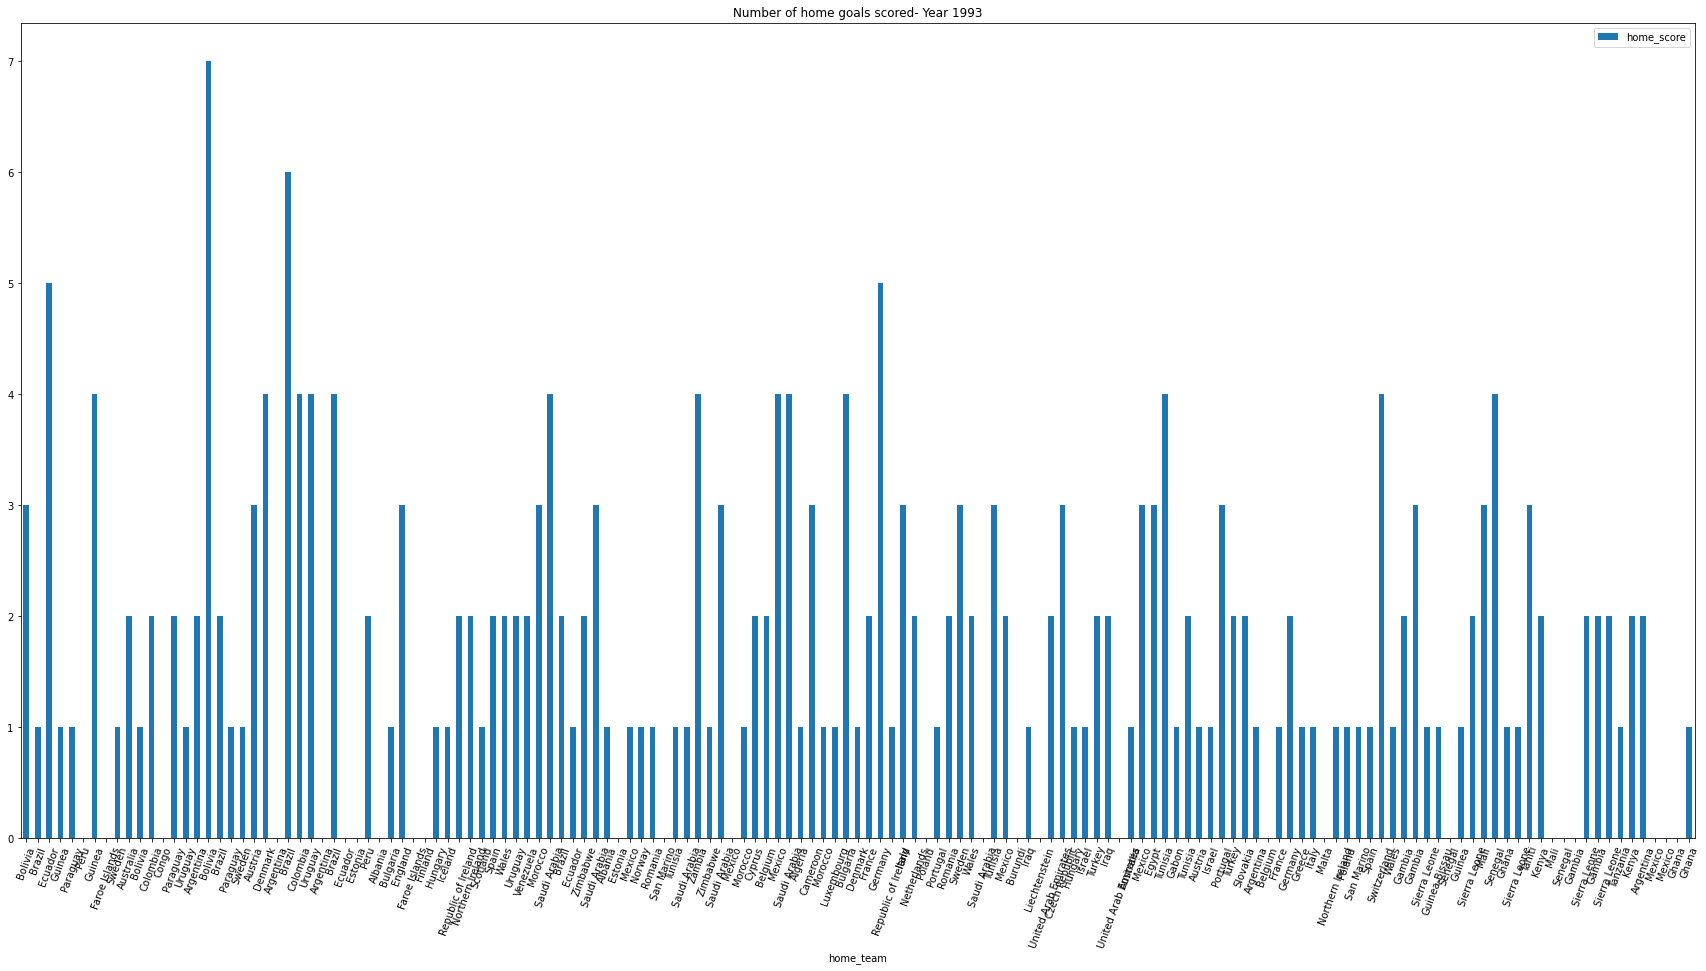

In [36]:
# Plotting a vertical bar chart for home_team vs. home_score

df_games_in_1993.plot.bar(x="home_team", y="home_score", rot=70, figsize=(30,15), title="Number of home goals scored- Year 1993");

plt.show(block=True);

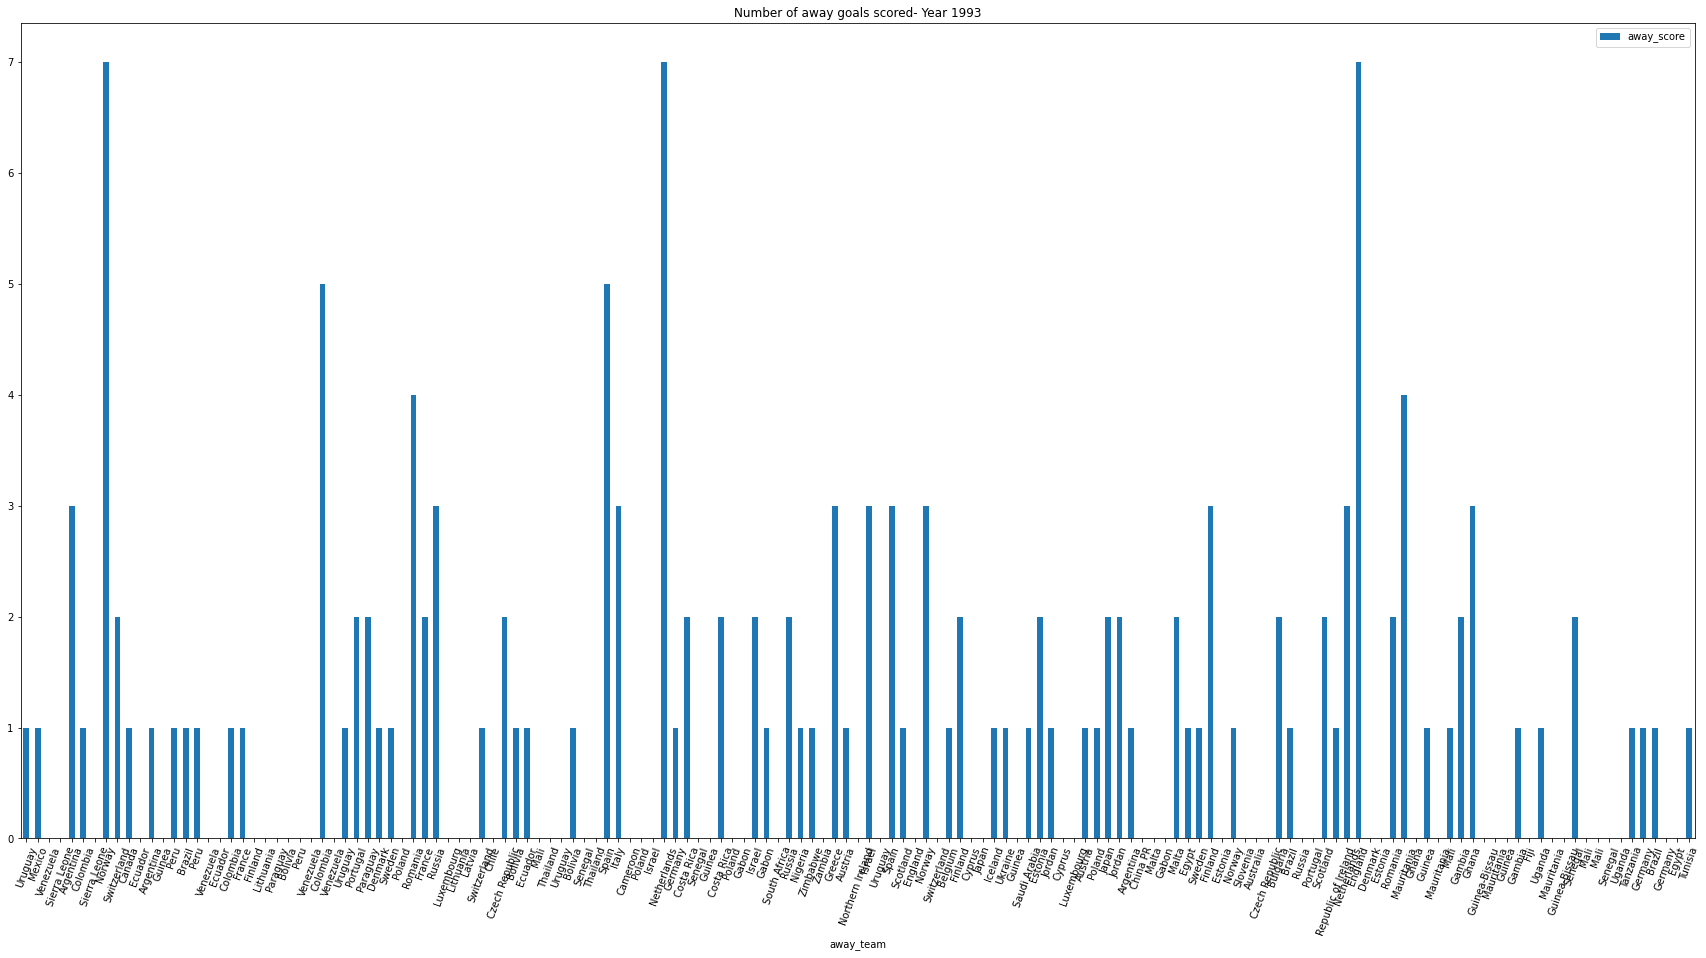

In [37]:
# Plotting a vertical bar chart for away_team vs. away_score

df_games_in_1993.plot.bar(x="away_team", y="away_score", rot=70, figsize=(30,15), title="Number of away goals scored- Year 1993");

plt.show(block=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

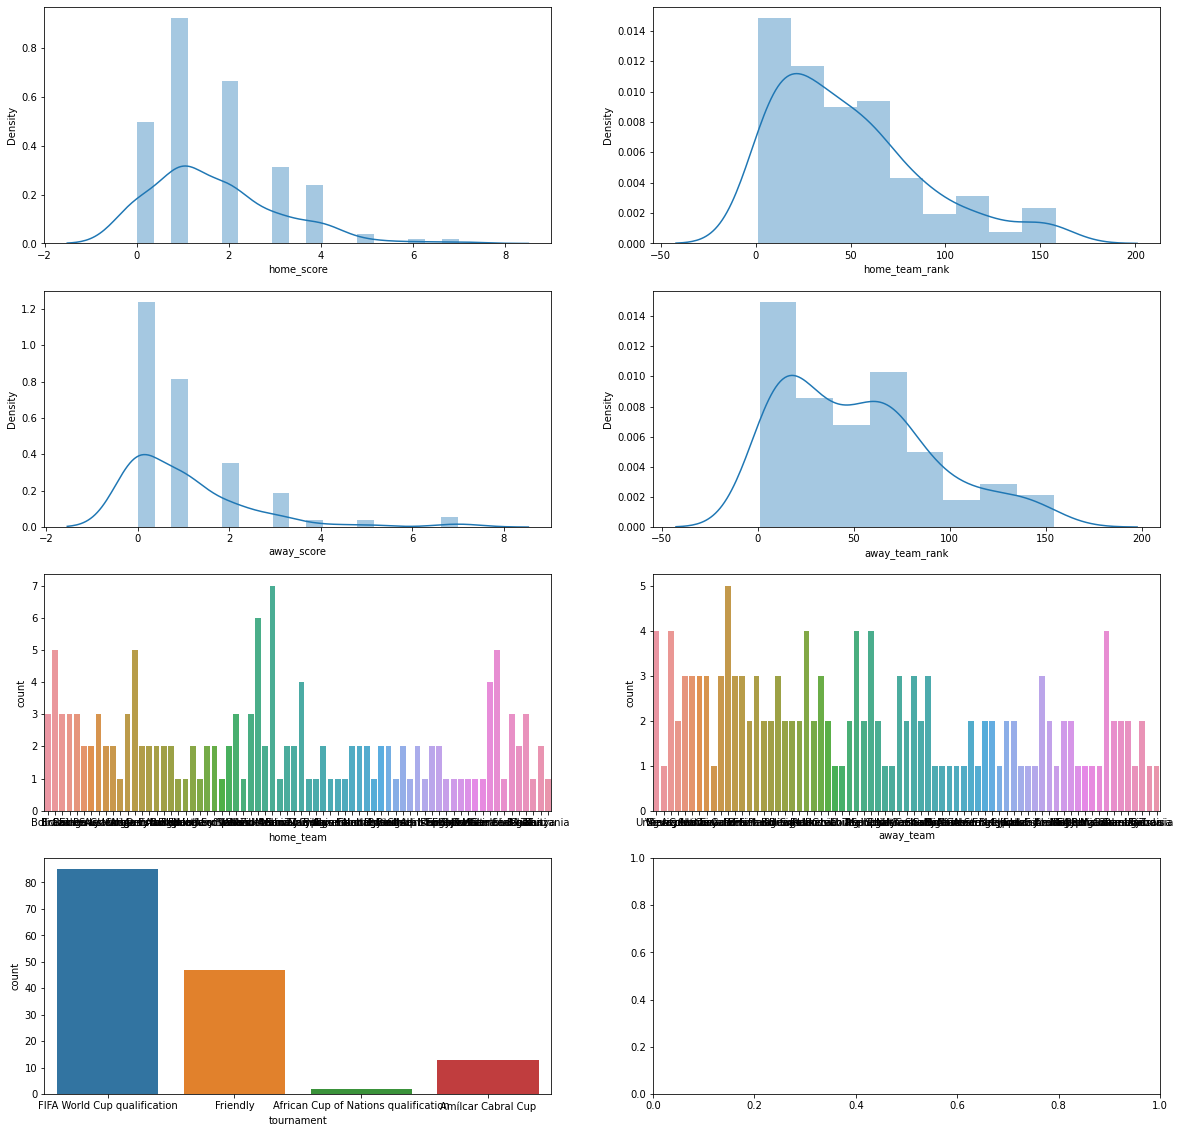

In [38]:
# Plotting Distribution Plots and Count Plots for the various attributes in our dataser
fig,axes=plt.subplots(4,2, figsize=(20,20))
sns.distplot(df_games_in_1993['home_score'], kde=True, ax=axes[0,0])
sns.distplot(df_games_in_1993['home_team_rank'].dropna(), kde=True, ax=axes[0,1])
sns.distplot(df_games_in_1993['away_score'].dropna(), kde=True, ax=axes[1,0])
sns.distplot(df_games_in_1993['away_team_rank'].dropna(), kde=True, ax=axes[1,1])
sns.countplot('home_team', data=df_games_in_1993, ax=axes[2,0])
sns.countplot('away_team', data=df_games_in_1993, ax=axes[2,1])
sns.countplot('tournament', data=df_games_in_1993, ax=axes[3,0])

###2. Bivariate Analysis

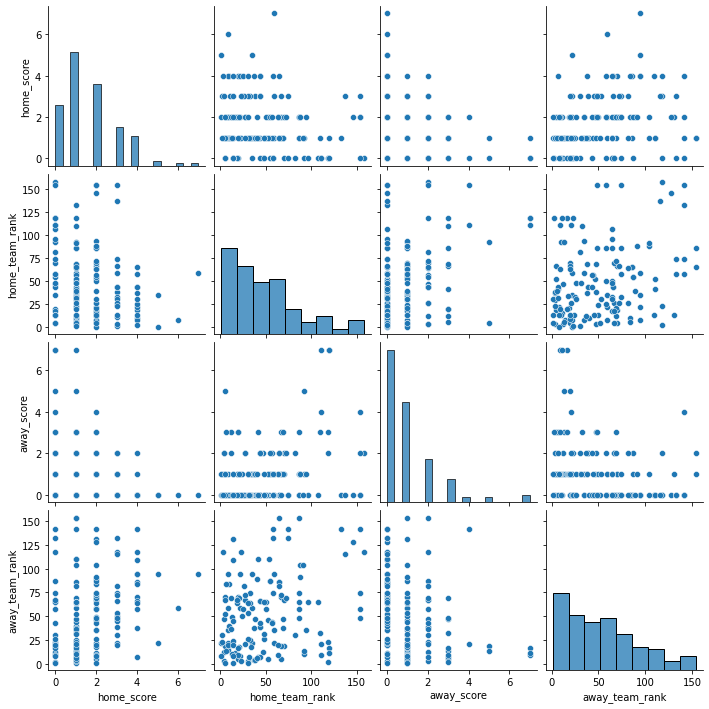

In [39]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_games_in_1993)
plt.show()

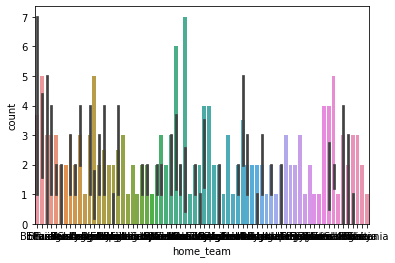

In [40]:
#Plots used are: bar plot and count plot
sns.barplot(x='home_team',y='home_score',data=df_games_in_1993)
sns.countplot(x='home_team',data=df_games_in_1993)

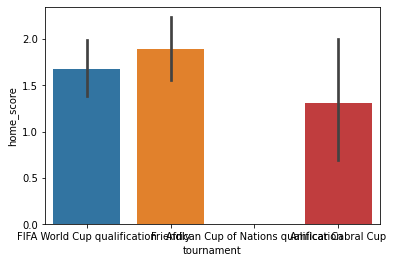

In [41]:
#Plots used are: bar plot
sns.barplot(x='tournament',y='home_score',data=df_games_in_1993)

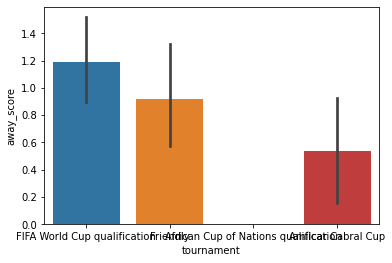

In [42]:
#Plots used are: bar plot
sns.barplot(x='tournament',y='away_score',data=df_games_in_1993)

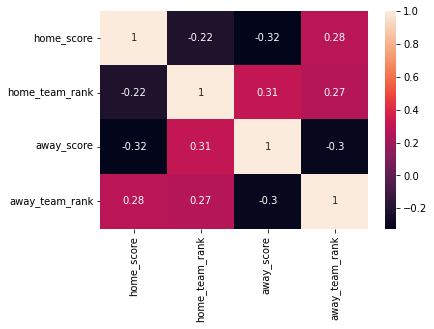

In [43]:
# Plotting a heatmap to show the correlation between the different numerical  variables
sns.heatmap(df_games_in_1993.corr(),annot=True)


From the correlation matrix, we see that the variables have weak correlation. For instance, away_team_rank and away_score have a correlation value of (-0.3), which implies that they have a negative weak correlation. 

In [44]:
# Let's check for multi-collinearity using the Pearson's correlation
corr = df_games_in_1993.corr()
corr

,home_score,home_team_rank,away_score,away_team_rank
home_score,1.000000,-0.218713,-0.323207,0.283032
home_team_rank,-0.218713,1.000000,0.310342,0.270628
away_score,-0.323207,0.310342,1.000000,-0.297904
away_team_rank,0.283032,0.270628,-0.297904,1.000000


From the table, we can see that the independent variables are not correlated. There is no value above 1.000

###3. Multivariate (PCA)

In [66]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
X = df_games_in_1993.drop('home_score', 1)
y = df_games_in_1993['home_score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [72]:
# Converting categorical variable into dummy/indicator variables with the get_dummies function 
X=pd.get_dummies(X, drop_first=True)

In [73]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# Performing standard scalar normalization to normalize our feature set.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [76]:
# # The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.98747069e-02, 2.45935024e-02, 2.16301004e-02, 1.81783523e-02,
       1.71940820e-02, 1.70232491e-02, 1.65480637e-02, 1.63882876e-02,
       1.61709773e-02, 1.60013052e-02, 1.57750660e-02, 1.56447440e-02,
       1.53937859e-02, 1.51539382e-02, 1.49497982e-02, 1.47302390e-02,
       1.43684996e-02, 1.42587785e-02, 1.41974807e-02, 1.39364432e-02,
       1.38860496e-02, 1.38326011e-02, 1.37133207e-02, 1.32358818e-02,
       1.31609429e-02, 1.29666283e-02, 1.29288505e-02, 1.26788522e-02,
       1.25452970e-02, 1.21694652e-02, 1.21026790e-02, 1.15415420e-02,
       1.13722757e-02, 1.13564392e-02, 1.12517702e-02, 1.12024932e-02,
       1.11366289e-02, 1.10412528e-02, 1.08832986e-02, 1.07422897e-02,
       1.07027102e-02, 1.06011660e-02, 1.04824933e-02, 1.04339549e-02,
       1.01099613e-02, 1.01027319e-02, 1.00438562e-02, 9.94739863e-03,
       9.88339410e-03, 9.82553245e-03, 9.48318984e-03, 9.16295736e-03,
       8.97534588e-03, 8.75241468e-03, 8.65219983e-03, 8.55479141e-03,
      

In [77]:
# Using 1 principal component to train our algorithm
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [78]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [79]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[1 8 0 0 0 0]
 [2 7 1 0 0 0]
 [0 4 0 0 0 0]
 [0 3 1 0 0 0]
 [0 2 0 0 0 0]
 [0 1 0 0 0 0]]
Accuracy 0.26666666666666666


This model is not viable because it does not give optimal performance. It has been able to correctly predict 8 out of 30 and it's accuracy level is 26.67%, which is quite low.

##7. Implementing the Solution

####Feature Engineering

In [81]:
# Creating a new column, goal difference which dictates whether the match played was a win,lose or draw, with the perspective of home team.
goal_difference=df_games_in_1993['home_score']-df_games_in_1993['away_score']
df_games_in_1993.insert(6,'goal_difference', goal_difference)
df_games_in_1993.head()

,date,home_team,home_score,home_team_rank,away_team,away_score,goal_difference,away_team_rank,tournament
17915,1993-08-08,Bolivia,3,59.0,Uruguay,1,2,22.0,FIFA World Cup qualification
17916,1993-08-08,Brazil,1,8.0,Mexico,1,0,14.0,Friendly
17917,1993-08-08,Ecuador,5,35.0,Venezuela,0,5,94.0,FIFA World Cup qualification
17918,1993-08-08,Guinea,1,65.0,Sierra Leone,0,1,86.0,Friendly
17919,1993-08-08,Paraguay,1,67.0,Argentina,3,-2,5.0,FIFA World Cup qualification


In [46]:
# Let's insert and populate the status column from a home_team perspective and identify if the mach was a win, draw or loss
# Status (W- Win, L-Loss, D- Draw)
# assigning a variable teams to the home_team column in the df_games_in_1993
teams = df_games_in_1993['home_team']
# Creating an empty list that will be used to store the score of each team
status = list()

# Defining a function to check if the home_score is great, less, or equal to the away_score
def totalpoints(row,team):
  if (row['home_team']==team) and (row['goal_difference'] > 0):
    val = 3
  elif (row['home_team']==team) and (row['goal_difference'] < 0):
    val = 0
  else:
    val = 1
# Returning the value of each team
  return val
# Querying the dataset for home_team and appending the status result of each team in the empty list we created above
for team in teams:
  result =df_games_in_1993.query(f'home_team == "{team}"')
  total_status = 0
  for index, row in result.iterrows():
    total_status = totalpoints(row,team)
  status.append(total_status)
# Creating a status column and populating it with its respective status (W,L,D)
df_games_in_1993.insert(9,'status', status)
df_games_in_1993

,date,home_team,home_score,home_team_rank,away_team,away_score,goal_difference,away_team_rank,tournament,status
17915,1993-08-08,Bolivia,3,59.0,Uruguay,1,2,22.0,FIFA World Cup qualification,3
17916,1993-08-08,Brazil,1,8.0,Mexico,1,0,14.0,Friendly,3
17917,1993-08-08,Ecuador,5,35.0,Venezuela,0,5,94.0,FIFA World Cup qualification,1
17918,1993-08-08,Guinea,1,65.0,Sierra Leone,0,1,86.0,Friendly,0
17919,1993-08-08,Paraguay,1,67.0,Argentina,3,-2,5.0,FIFA World Cup qualification,1
...,...,...,...,...,...,...,...,...,...,...
18086,1993-12-15,Argentina,2,5.0,Germany,1,1,1.0,Friendly,3
18087,1993-12-16,Mexico,0,14.0,Brazil,1,-1,8.0,Friendly,1
18090,1993-12-22,Mexico,0,14.0,Germany,0,0,1.0,Friendly,1
18092,1993-12-29,Ghana,0,48.0,Egypt,0,0,26.0,Friendly,1


In [47]:
# Replacing the values in status column with a Win(W) in place of 3, a Draw(D) in place of 1, and a Loss(L) in place of 0
df_games_in_1993["status"].replace({0: "L", 1: "D", 3: "W" }, inplace=True)
# Reseting the index
df_games_in_1993.reset_index(drop=True, inplace=True)
# Previewing the forst five records of the dataset
df_games_in_1993

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,home_team,home_score,home_team_rank,away_team,away_score,goal_difference,away_team_rank,tournament,status
0,1993-08-08,Bolivia,3,59.0,Uruguay,1,2,22.0,FIFA World Cup qualification,W
1,1993-08-08,Brazil,1,8.0,Mexico,1,0,14.0,Friendly,W
2,1993-08-08,Ecuador,5,35.0,Venezuela,0,5,94.0,FIFA World Cup qualification,D
3,1993-08-08,Guinea,1,65.0,Sierra Leone,0,1,86.0,Friendly,L
4,1993-08-08,Paraguay,1,67.0,Argentina,3,-2,5.0,FIFA World Cup qualification,D
...,...,...,...,...,...,...,...,...,...,...
142,1993-12-15,Argentina,2,5.0,Germany,1,1,1.0,Friendly,W
143,1993-12-16,Mexico,0,14.0,Brazil,1,-1,8.0,Friendly,D
144,1993-12-22,Mexico,0,14.0,Germany,0,0,1.0,Friendly,D
145,1993-12-29,Ghana,0,48.0,Egypt,0,0,26.0,Friendly,D


###1. Polynomial Regression Analysis

### 1.Predicting the Home Score

In [49]:
#Get the columns that will be used in building a model from the dataset 
X = df_games_in_1993.drop('home_score', 1)
y = df_games_in_1993['home_score']
print(X)
print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



           date  home_team  home_team_rank     away_team  away_score  \
0    1993-08-08    Bolivia            59.0       Uruguay           1   
1    1993-08-08     Brazil             8.0        Mexico           1   
2    1993-08-08    Ecuador            35.0     Venezuela           0   
3    1993-08-08     Guinea            65.0  Sierra Leone           0   
4    1993-08-08   Paraguay            67.0     Argentina           3   
..          ...        ...             ...           ...         ...   
142  1993-12-15  Argentina             5.0       Germany           1   
143  1993-12-16     Mexico            14.0        Brazil           1   
144  1993-12-22     Mexico            14.0       Germany           0   
145  1993-12-29      Ghana            48.0         Egypt           0   
146  1993-12-31      Ghana            48.0       Tunisia           1   

     goal_difference  away_team_rank                    tournament status  
0                  2            22.0  FIFA World Cup qualif

In [50]:
# Converting categorical variable into dummy/indicator variables with the get_dummies function 
X=pd.get_dummies(X, drop_first=True)

In [51]:
# Splitting the dataset into the Training set and Test set
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [52]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [53]:
# Assess the accuracy of the model
y_poly_pred=pol_reg.predict(X_poly)

In [54]:
# Calculating the RMSE and r2 values of the model
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE is "+ str(rmse))
print("r2 is "+str(r2))

RMSE is 2.0997727907121552e-12
r2 is 1.0


This model is can not give us accurate predictions because the RMSE value is big, hence, the model can be considered not viable.

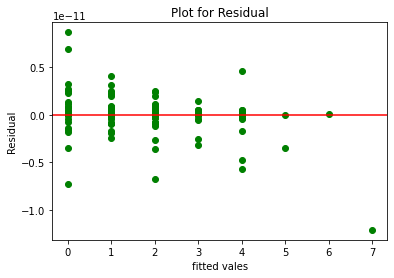

In [83]:
# Residual plots and heteroskedasticity testing
residual = y_poly_pred - y
# Plotting the prediction errors
plt.scatter(y_poly_pred, residual, color ='green')
plt.title('Plot for Residual')
plt.ylabel('Residual')
plt.xlabel('fitted vales')
plt.axhline(y= residual.mean(), color ='red')
plt.show()

### 2.Predicting the Away Score

In [61]:
#Get the columns that will be used in building a model from the dataset 
X = df_games_in_1993.drop('away_score', 1)
y = df_games_in_1993['away_score']
print(X)
print(y)

           date  home_team  home_score  home_team_rank     away_team  \
0    1993-08-08    Bolivia           3            59.0       Uruguay   
1    1993-08-08     Brazil           1             8.0        Mexico   
2    1993-08-08    Ecuador           5            35.0     Venezuela   
3    1993-08-08     Guinea           1            65.0  Sierra Leone   
4    1993-08-08   Paraguay           1            67.0     Argentina   
..          ...        ...         ...             ...           ...   
142  1993-12-15  Argentina           2             5.0       Germany   
143  1993-12-16     Mexico           0            14.0        Brazil   
144  1993-12-22     Mexico           0            14.0       Germany   
145  1993-12-29      Ghana           0            48.0         Egypt   
146  1993-12-31      Ghana           1            48.0       Tunisia   

     goal_difference  away_team_rank                    tournament status  
0                  2            22.0  FIFA World Cup qualif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [62]:
# Converting categorical variable into dummy/indicator variables with the get_dummies function 
X=pd.get_dummies(X, drop_first=True)

In [63]:
# Splitting the dataset into the Training set and Test set
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [64]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [139]:
# Assessing the accuracy of the model
y_poly_pred=pol_reg.predict(X_poly)

In [59]:
# Calculating the RMSE and r2 values of the model
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE is "+ str(rmse))
print("r2 is "+str(r2))

RMSE is 2.0997727907121552e-12
r2 is 1.0


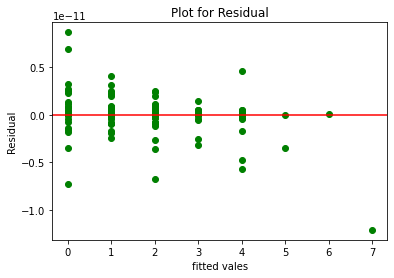

In [60]:
# Residual plots and heteroskedasticity testing
residual =y_poly_pred - y
# Plotting the prediction errors
plt.scatter(y_poly_pred, residual, color ='green')
plt.title('Plot for Residual')
plt.ylabel('Residual')
plt.xlabel('fitted vales')
plt.axhline(y= residual.mean(), color ='red')
plt.show()

### Linear Regression

In [56]:
#Get the columns that will be used in building a model from the dataset 
X = df_games_in_1993.drop('home_score', 1)
y = df_games_in_1993['home_score']
print(X)
print(y)


           date  home_team  home_team_rank     away_team  away_score  \
0    1993-08-08    Bolivia            59.0       Uruguay           1   
1    1993-08-08     Brazil             8.0        Mexico           1   
2    1993-08-08    Ecuador            35.0     Venezuela           0   
3    1993-08-08     Guinea            65.0  Sierra Leone           0   
4    1993-08-08   Paraguay            67.0     Argentina           3   
..          ...        ...             ...           ...         ...   
142  1993-12-15  Argentina             5.0       Germany           1   
143  1993-12-16     Mexico            14.0        Brazil           1   
144  1993-12-22     Mexico            14.0       Germany           0   
145  1993-12-29      Ghana            48.0         Egypt           0   
146  1993-12-31      Ghana            48.0       Tunisia           1   

     away_team_rank                    tournament status  
0              22.0  FIFA World Cup qualification      W  
1              14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [57]:
# Converting categorical variable into dummy/indicator variables with the get_dummies function 
X=pd.get_dummies(X, drop_first=True)

In [58]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
# Assessing the accuracy of the model
y_pred = regressor.predict(X_test)
# Calculating the MAE,MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.618927588793142
Mean Squared Error: 3.7368176121375467
Root Mean Squared Error: 1.9330849986841103


Although this is an improvement of the polynomial regression, the model is still not fit to give us good results. The RMSE is still high.

In [60]:
# Cross-validation using K-folds
from sklearn.model_selection import KFold

X = df_games_in_1993.drop('home_score', 1)
y = df_games_in_1993['home_score']

X=pd.get_dummies(X, drop_first=True)

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


we are using 5 folds

Training model 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Model 1 Root Mean Squared Error: 1.754345030142828

Training model 2
Model 2 Root Mean Squared Error: 2.151652231465001

Training model 3
Model 3 Root Mean Squared Error: 20244249586.472515

Training model 4
Model 4 Root Mean Squared Error: 24859533237.669067

Training model 5
Model 5 Root Mean Squared Error: 2.846821689626761


In [61]:
print(np.mean(RMSES))

9020756566.17888


In [62]:
# Cross-valiadting using LeaveOneOut method
from sklearn.model_selection import LeaveOneOut

X = df_games_in_1993.drop('home_score', 1)
y = df_games_in_1993['home_score']

X=pd.get_dummies(X, drop_first=True)

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



we are using 147 folds
trained 147 models


17783015145.661804

### Logistic Regression

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

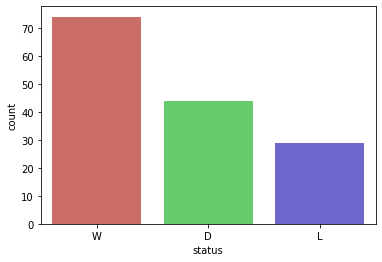

In [63]:
# Plotting a countplot for the win,draw and loses 
import seaborn as sb
sb.countplot(x='status',data=df_games_in_1993, palette='hls')

In [65]:
# Checking if the dataset has any missing values
df_games_in_1993.isnull().sum().sum()

0

In [67]:
# Checking the information of the dataset
df_games_in_1993.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            147 non-null    object 
 1   home_team       147 non-null    object 
 2   home_score      147 non-null    int64  
 3   home_team_rank  147 non-null    float64
 4   away_team       147 non-null    object 
 5   away_score      147 non-null    int64  
 6   away_team_rank  147 non-null    float64
 7   tournament      147 non-null    object 
 8   status          147 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 10.5+ KB


In [77]:
#Get the columns that will be used in building a model from the dataset 
X = df_games_in_1993.iloc[:, [1,2,3,4,5,6,7]]
y = df_games_in_1993["status"]
print(X)
print(y)
# Converting categorical variable into dummy/indicator variables with the get_dummies function
X=pd.get_dummies(X, drop_first=True)

     home_team  home_score  home_team_rank     away_team  away_score  \
0      Bolivia           3            59.0       Uruguay           1   
1       Brazil           1             8.0        Mexico           1   
2      Ecuador           5            35.0     Venezuela           0   
3       Guinea           1            65.0  Sierra Leone           0   
4     Paraguay           1            67.0     Argentina           3   
..         ...         ...             ...           ...         ...   
142  Argentina           2             5.0       Germany           1   
143     Mexico           0            14.0        Brazil           1   
144     Mexico           0            14.0       Germany           0   
145      Ghana           0            48.0         Egypt           0   
146      Ghana           1            48.0       Tunisia           1   

     away_team_rank                    tournament  
0              22.0  FIFA World Cup qualification  
1              14.0            

In [78]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [79]:
# find optimal coefficients and intercept
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [80]:
# Assessing the accuracy of the model
y_pred = LogReg.predict(X_test)

In [81]:
# Confusion matrix to identify how many attributes are correclty predicted by our model
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 9,  0,  2],
       [ 0,  7,  2],
       [ 2,  1, 22]])

Noting that from the output logistic regression algorithm is able to correctly predict 38 out of 45 instances, 
resulting in 84.44% accuracy, which is somewhat acceptable.

In [84]:
# Calcuating the accuracy and f1 of the model
print("The acuuracy of the model is", {accuracy_score(y_test,y_pred)})
print("The f1 of the model is", {f1_score(y_test,y_pred, average="macro")})

The acuuracy of the model is {0.8444444444444444}
The f1 of the model is {0.8348187759952466}


##8. Challenging the Solution

From the models used, the accuracy levels are not so good. It is therefore benefial to try other models to find the accuracy levels of predictions.

##9. Follow-Up Questions

1.What influences good performance for home_teams as compared to away_teams?